<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>The Sparks Foundation Task_3 : Explority Data Analysis - Retail</h3>
<h4>Perform EDA on Sample Superstore Dataset</h4>

<h3>Loading Packages and Data</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<h3>EDA ( Exploratory Data Analysis )</h3>

>**Full summary of the dataframe**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


>**Dataset Statistical Information Display**

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


>**Find the fatures dtypes**

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

>**Shape of the data**

In [6]:
df.shape

(9994, 13)

>**Check Null Values**

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

>**Check Duplications**

In [8]:
df.duplicated().any()

True

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().any()

False

>**return Series with number of distinct observations over requested axis**

In [11]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [13]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [14]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [15]:
df['City'].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [16]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [17]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [18]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [19]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [20]:
df['Quantity'].value_counts()

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [21]:
df['Discount'].value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [22]:
df['Profit'].value_counts()

0.0000     65
6.2208     42
9.3312     36
3.6288     31
5.4432     30
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: Profit, Length: 7287, dtype: int64

In [23]:
df['Sales'].value_counts()

12.960     55
19.440     37
15.552     37
10.368     35
25.920     34
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: Sales, Length: 5825, dtype: int64

In [24]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


><h3>Visualizations<h/3>

>**Univariate Analysis**

>Check outliers

<AxesSubplot:ylabel='Postal Code'>

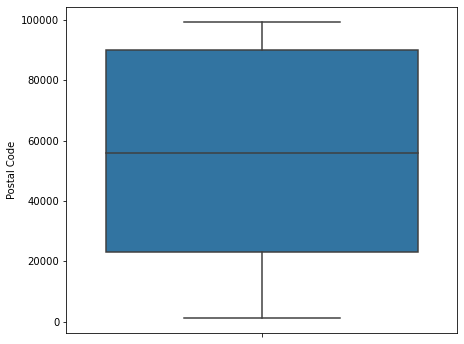

In [25]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Postal Code'])

<AxesSubplot:ylabel='Quantity'>

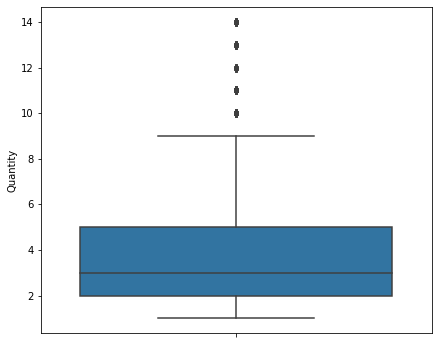

In [26]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Quantity'])

<AxesSubplot:ylabel='Discount'>

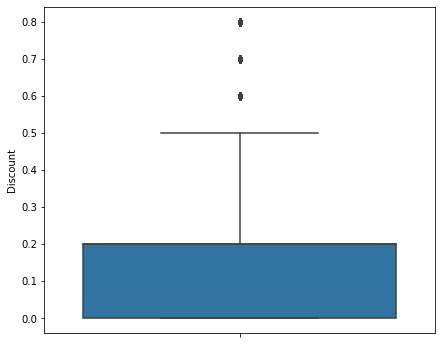

In [27]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Discount'])

<AxesSubplot:ylabel='Sales'>

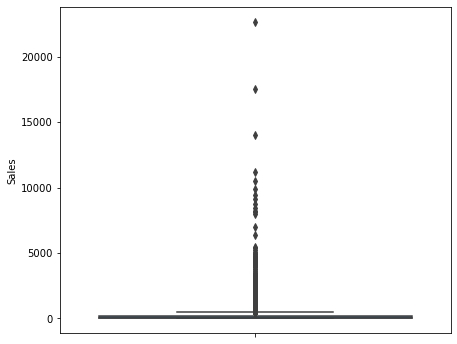

In [28]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Sales'])

<AxesSubplot:ylabel='Profit'>

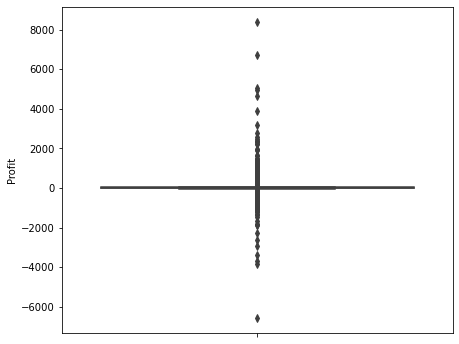

In [29]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Profit'])

<AxesSubplot:xlabel='Postal Code', ylabel='Density'>

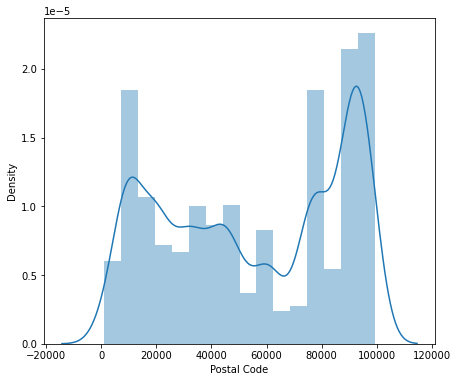

In [30]:
plt.figure(figsize=(7,6))
sns.distplot(df['Postal Code'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

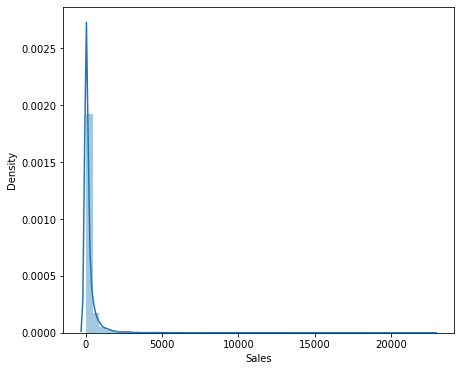

In [31]:
plt.figure(figsize=(7,6))
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

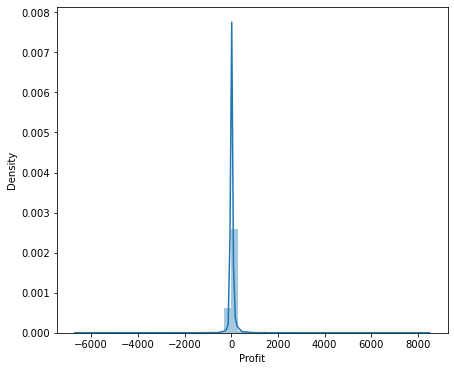

In [32]:
plt.figure(figsize=(7,6))
sns.distplot(df['Profit'])

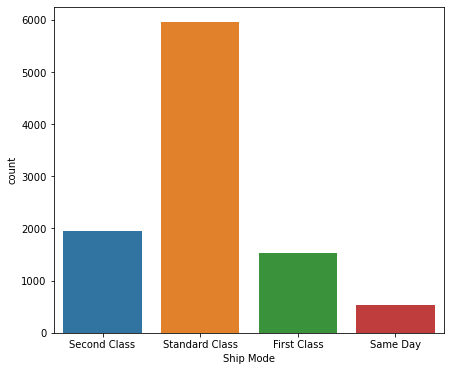

In [33]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Ship Mode')
plt.show()

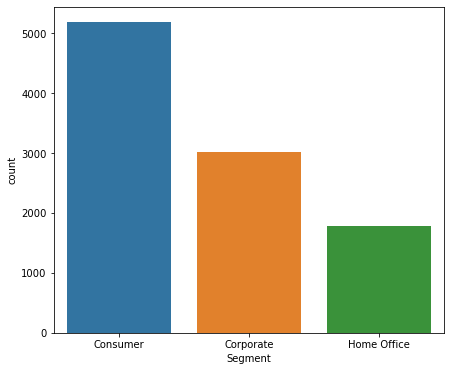

In [34]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Segment')
plt.show()

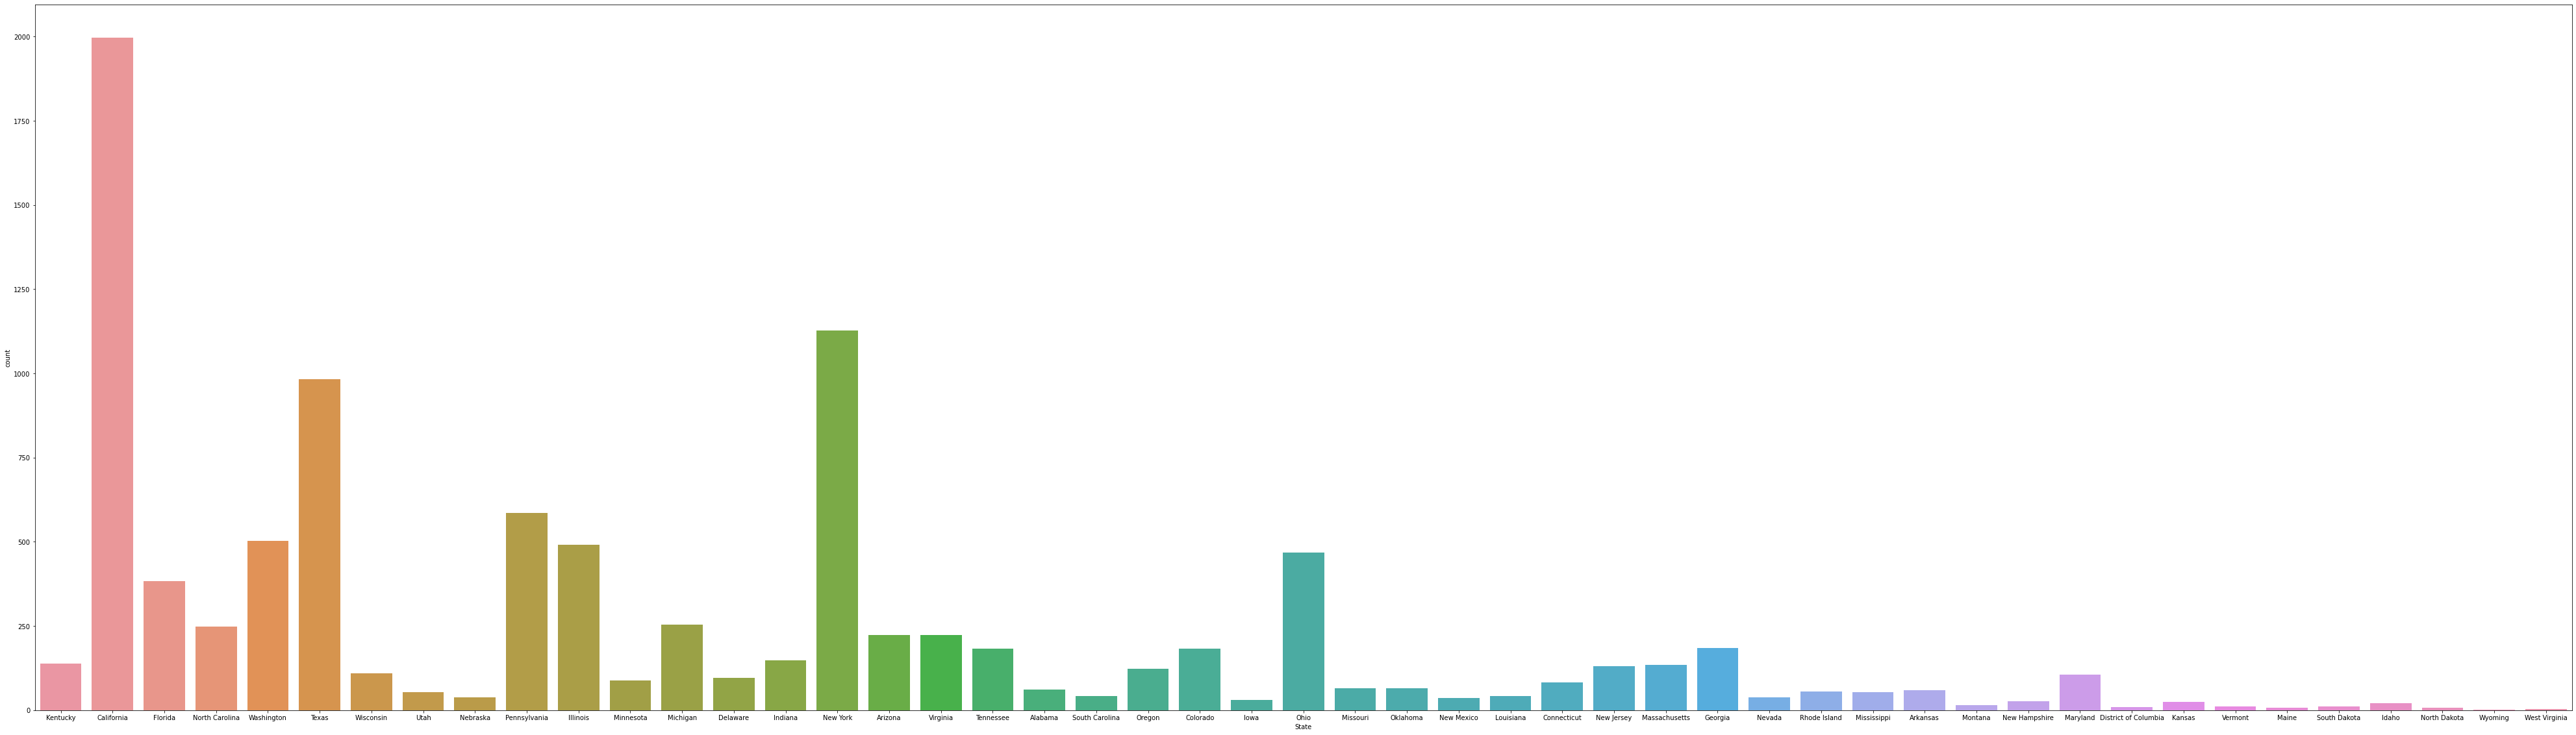

In [35]:
plt.figure(figsize=(70,20))
sns.countplot(data=df, x='State')
plt.show()

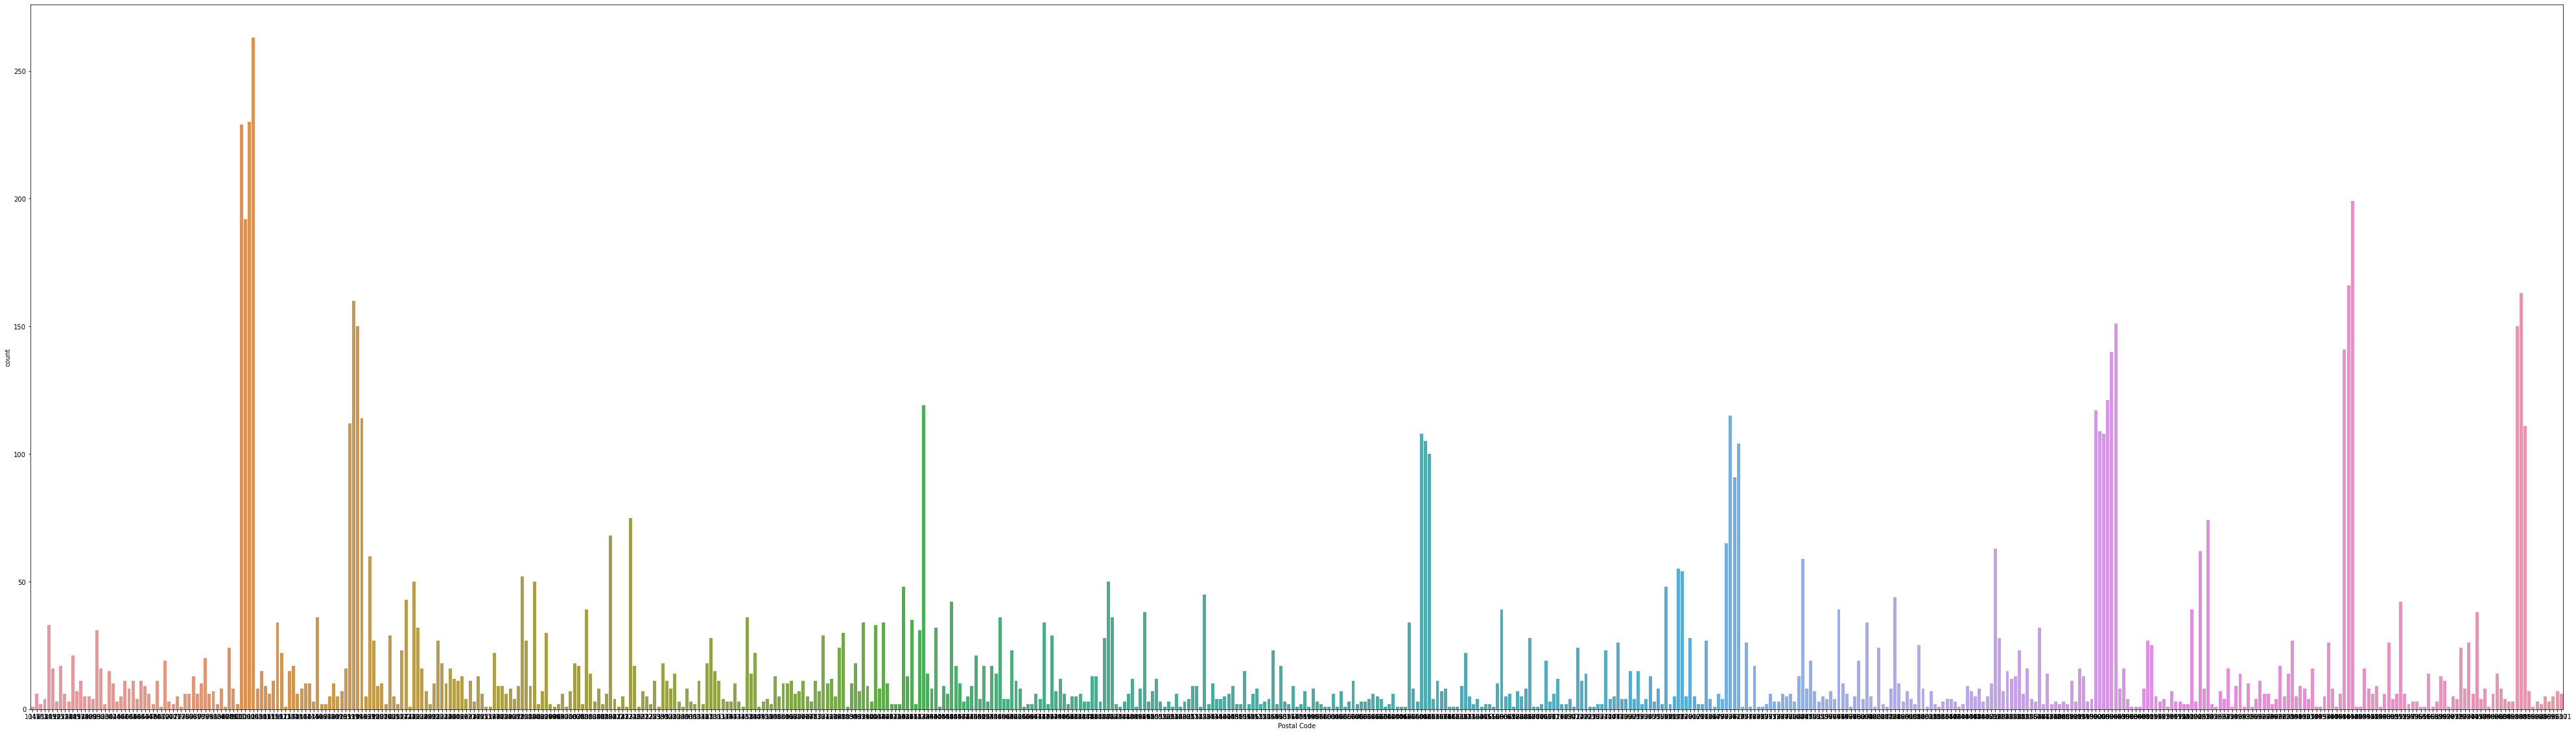

In [36]:
plt.figure(figsize=(70,20))
sns.countplot(data=df, x='Postal Code')
plt.show()

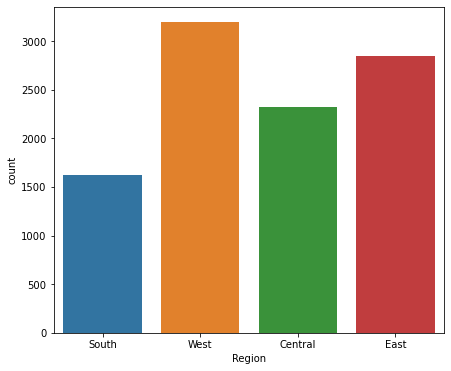

In [37]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Region')
plt.show()

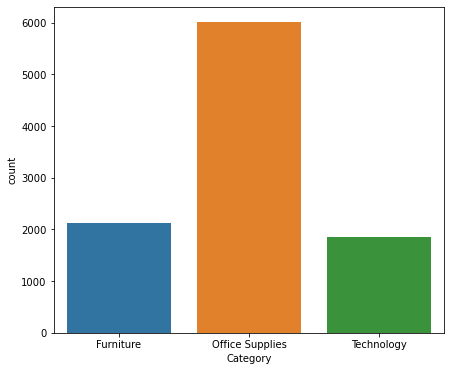

In [38]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Category')
plt.show()

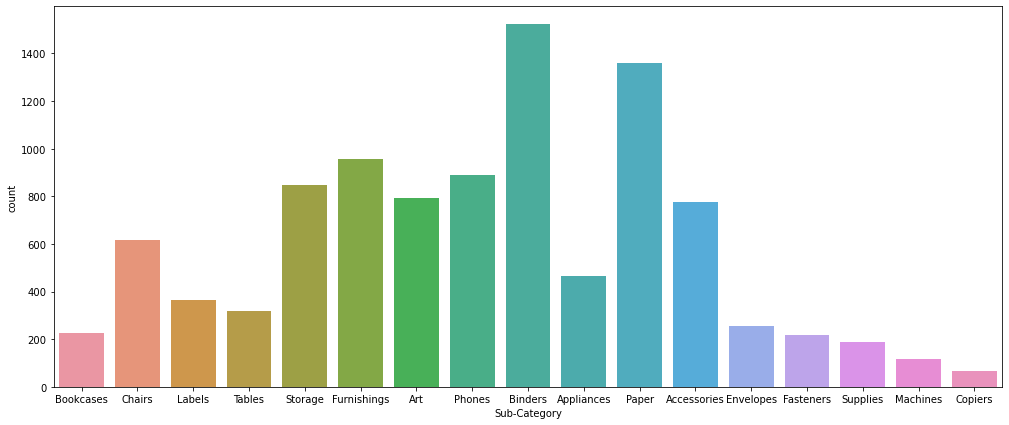

In [39]:
plt.figure(figsize=(17,7))
sns.countplot(data=df, x='Sub-Category')
plt.show()

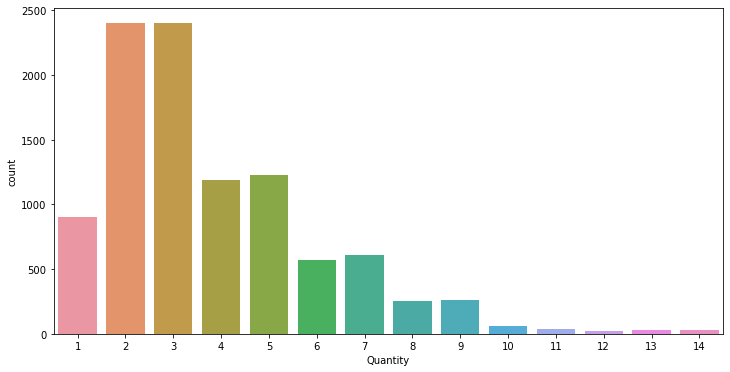

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Quantity')
plt.show()

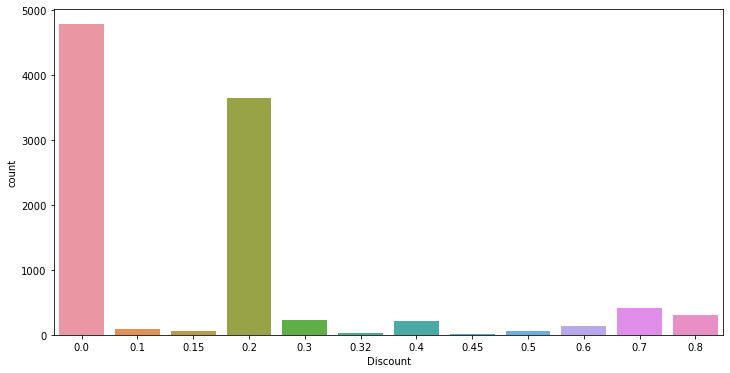

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Discount')
plt.show()

>Bivariate Analysis

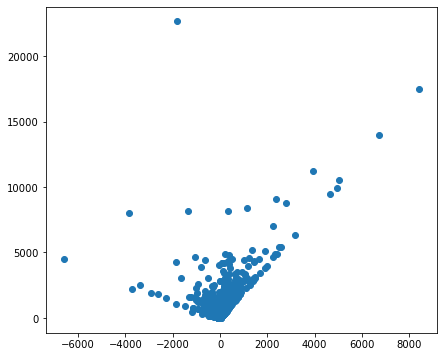

In [42]:
plt.figure(figsize=(7,6))
plt.scatter(df['Profit'], df['Sales'])
plt.show()

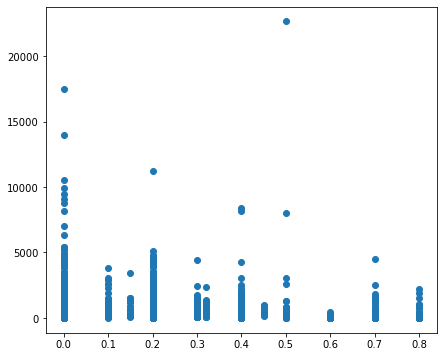

In [43]:
plt.figure(figsize=(7,6))
plt.scatter(df['Discount'], df['Sales'])
plt.show()

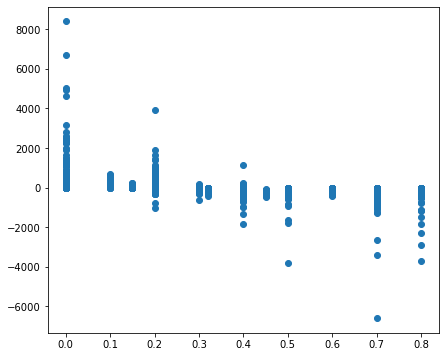

In [44]:
plt.figure(figsize=(7,6))
plt.scatter(df['Discount'], df['Profit'])
plt.show()

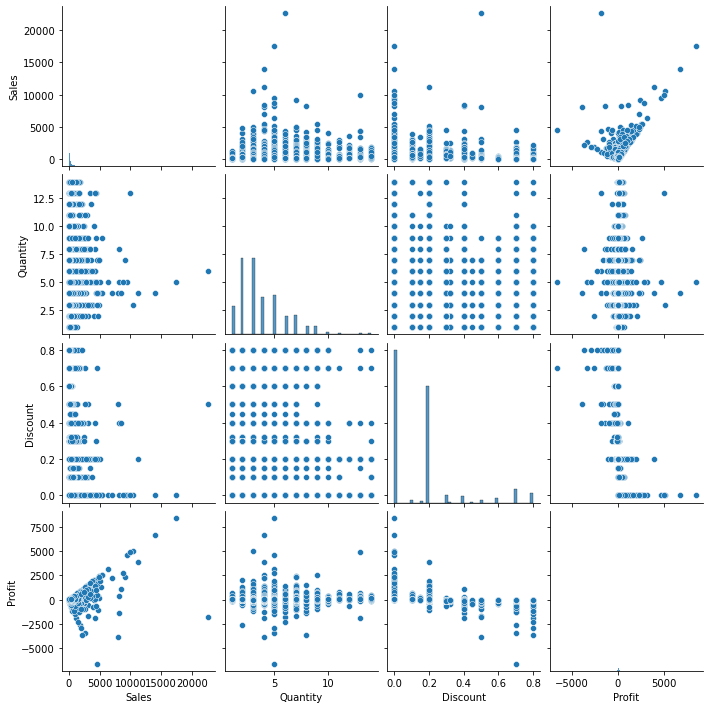

In [45]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']])

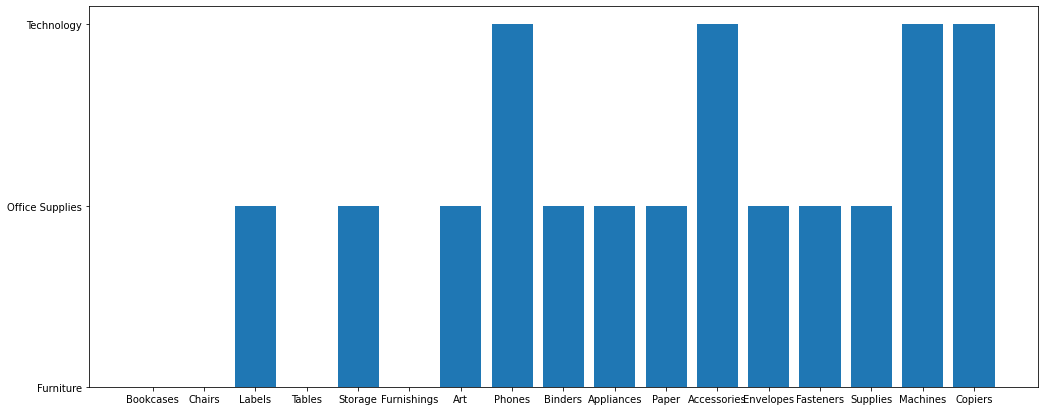

In [46]:
plt.figure(figsize=(17,7))
plt.bar('Sub-Category','Category', data=df)
plt.show()

<AxesSubplot:title={'center':'State VS Profit'}, xlabel='State'>

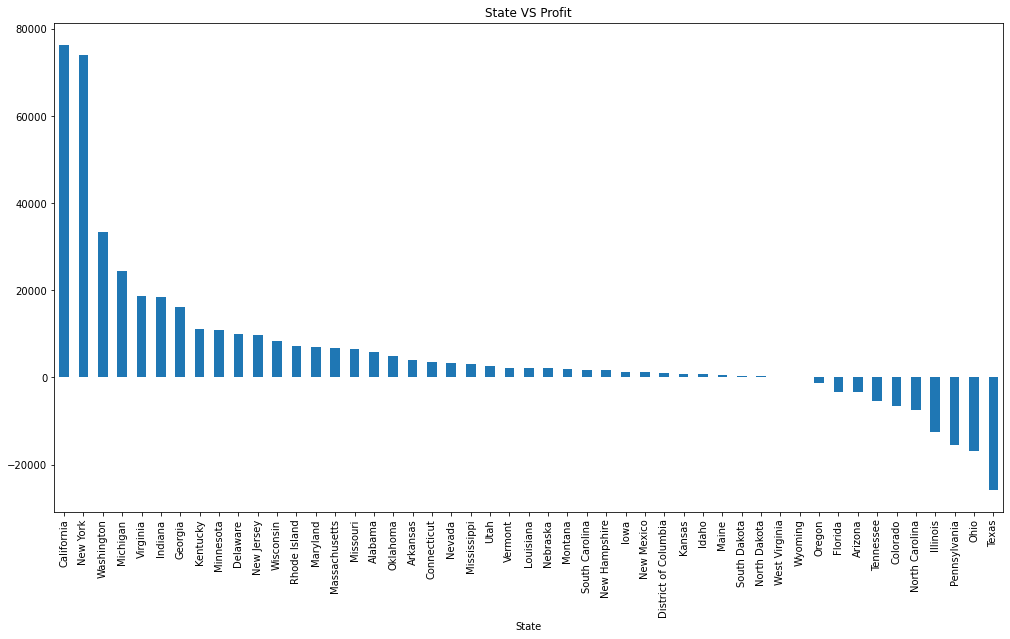

In [47]:
plt.figure(figsize=(17,9))
state_profit = df.groupby(['State'])['Profit'].sum()
state_profit.sort_values(ascending=False, inplace=True)
plt.title('State VS Profit')
state_profit.plot.bar()

<AxesSubplot:xlabel='Category', ylabel='Sales'>

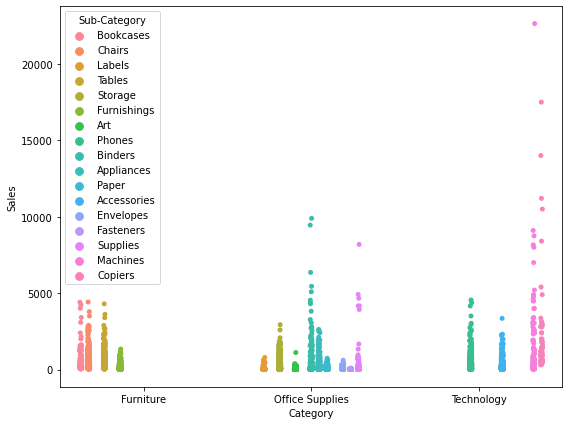

In [48]:
plt.figure(figsize=(9,7))
sns.stripplot(x='Category', y='Sales', data=df, hue='Sub-Category', dodge=True)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

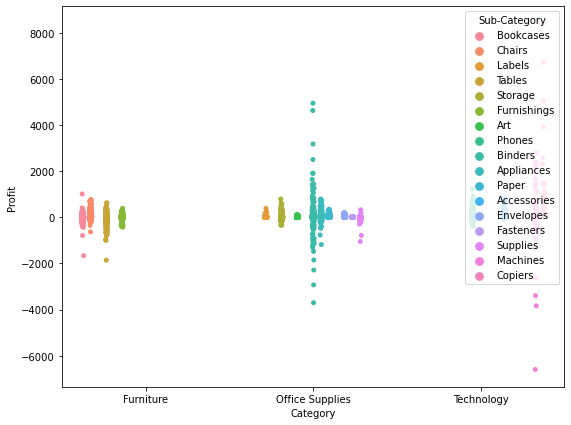

In [49]:
plt.figure(figsize=(9,7))
sns.stripplot(x='Category', y='Profit', data=df, hue='Sub-Category', dodge=True)

<AxesSubplot:ylabel='Sub-Category'>

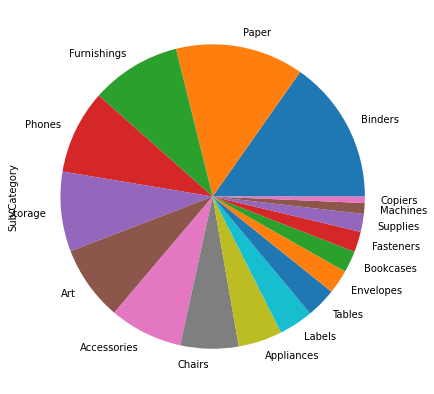

In [50]:
plt.figure(figsize=(9,7))
df['Sub-Category'].value_counts().plot.pie()